In [1]:
import keras.layers as kl
from keras.models import Model, Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

Using TensorFlow backend.


 **Neural_Network Class.**
 - This class lets the user to create a model with customized layers. In order to make your own model, add a sequence of layers from Keras.layers libraries into a list, and set it as the parameter "layers"

In [2]:
'''
This class creates a neural network model
with customizable layers.
'''
class Neural_Network:
    
    def __init__(self,input_shape,output_shape,epochs,batch_size,layers):
        self.input_shape_ = input_shape
        self.output_shape_ = output_shape
        self.epochs_ = epochs
        self.batch_size_ = batch_size
        self.layers_ = layers
        self.model_ = self.__build_model__()


    '''
    The layers parameters will be used in this function.
    A sequential of layers will be added to the model
    '''
    def __build_model__(self):
        
        model = Sequential()
        for layer in self.layers_:
            model.add(layer)
        
        model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
        
        return model

    
    '''
    This function trains the model
    '''
    def __train__(self,X,y,val_X,val_y):
        self.training_info_ = self.model_.fit(x=X, y=y, 
                        batch_size=self.batch_size_, epochs=self.epochs_, validation_split=1, 
                        validation_data=(val_X,val_y), shuffle=True)
        
        self.__plot__(self.training_info_.history['accuracy'])
        
        
    '''
    This function plots the training progress to a graph
    If the parameter 'savefig' is changed to True,
    the graph will be saved to a png file in current directory
    '''
    def __plot__(self, accuracy, savefig=False):
        plt.figure(figsize=(10,8))
        plt.title("Training_Progress")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.plot(accuracy, label="Accuracy")
        plt.legend()
        if savefig == "True":
            plt.savefig("training_progress.png")
        plt.show()
        
        
    '''
    This function tests the trained model.
    It is recommended to run it after __train__
    '''
    def __test__(self,X,y):
        self.test_info_ = self.model_.evaluate(X,y,verbose=0)
        print("========================= MODEL TEST =========================")
        print("Loss test: {}".format(self.test_info_[0]))
        print("Accuracy test: {}".format(self.test_info_[1]))
        print("============================ END ============================")
        
        
    '''
    This function takes lung X-ray image as input
    and predict the condition.
    If the parameter 'output' is changed to True,
    The predicted result will be outputed.
    '''
    def __predict__(self, X, y, output=False):
        self.predict_info_ = self.model_.predict(X)
        if output == True:
            self.__plot_prediction__(X,y)
                
                
    '''
    This function outputs the prediction made from __predict__.
    It shows the image, prediction, and actual value as one line.
    If the input for prediction is an array, the output will be a chart.
    '''
    def __plot_prediction__(self,X,y):
        target_name = ["Normal", "Bacteria", "Virus"]
        predict_text = np.argmax(self.predict_info_, axis=1)
        predict_text = self.__convert_target__(predict_text,target_name)
        y_text = self.__convert_target__(y,target_name)
        num_data = len(self.predict_info_)
        plt.figure(figsize=(4,num_data),dpi=100)
        offset = 1
        self.predict_error_ = 0
        for i in range(num_data):
            sub = plt.subplot(num_data,2,i+offset)
            plt.imshow(X[i])
            sub.set_axis_off()
            
            sub2 = plt.subplot(num_data,2,i+offset+1)
            pred = np.argmax(self.predict_info_[i]) - y[i]
            color = "green"
            if pred != 0:
                self.predict_error_ += 1
                color = "red"
            plt.text(0.0,0.5,"predict: %s" % (predict_text[i]),bbox=dict(facecolor=color,alpha=0.5))
            plt.text(1.0,0.5,"Actual: %s" % (y_text[i]),bbox=dict(facecolor=color,alpha=0.5))
            sub2.set_axis_off()
            offset += 1
        plt.show()
        
        print("========================= Prediction Accuracy =========================")
        print(num_data)
        print(self.predict_error_)
        print("Correct Prediction: {}/{}".format((num_data-self.predict_error_),num_data))
        print("Incorrect Prediction: {}/{}".format(self.predict_error_,num_data))
        print("Accuracy: {}".format((num_data-self.predict_error_)/num_data))
        print("================================== END ==================================")
        
        
    '''
    This function converts the target values (integers) into specified names.
    The parameters 'names' contains a list of names that the user wishes to 
    use for target.
    '''    
    def __convert_target__(self,y,names):
        target = []
        for i in y:
            target.append(names[i])
        return target

 **Helper Class.**

In [3]:
'''
This class consists of helper functions to create neural network models.
'''
class Helper:
    
    def __init__(self):
        pass

    
    '''
    This function returns a set of images and its label.
    The parameter 't' specifies data's directories, which include
    "train", "validation", "test" ,"sample", and "predict".
    '''
    def _get_data_(self, t, shape, dimension, path="..\\data"):
        path += "\\%s" % (t)
        normal_path = path + "\\NORMAL\\"
        pneumonia_path = path + "\\PNEUMONIA\\"
        
        X = []
        y = []
        
        for c in os.listdir(normal_path):
            X.append(self._image_processing_(
            normal_path+c,shape,dim=dimension))
            y.append(0)
        for c in os.listdir(pneumonia_path):
            if "bacteria" in c:   
                X.append(self._image_processing_(
                pneumonia_path+c,shape,dim=dimension))
                y.append(1)
            elif "virus" in c:
                X.append(self._image_processing_(
                pneumonia_path+c,shape,dim=dimension))
                y.append(2)

        return np.array(X), np.array(y)
            
            
    '''
    This function processes an image (input) to fit the model's input shape.
    It returns either a 2d image or a 3d image.
    '''
    def _image_processing_(self, img_path, resize_shape, dim=2):
        img = cv.imread(img_path)
        if dim == 2:
            img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        img_resize = cv.resize(img,resize_shape)
        img_norm = img_resize / 255
        return img_norm
    
    
    '''
    This function already exists as part of Neural_Network class.
    It is also added to Helper class just in case needed.
    '''
    def _convert_target_(y, names):
        target = []
        for i in y:
            target.append(names[i])
        return target
        

 - **Layers for models. "hidden_layers" layers are for ANN model, and "conv_layers" layers are for CNN model**

In [4]:
# The layer for Artificial Neural Network (ANN) model.
hidden_layers = [
    kl.Flatten(),
    kl.Dense(256),
    kl.Activation('sigmoid'),
    kl.Dense(64),
    kl.Activation('sigmoid'),
    kl.Dense(3,activation='softmax')
]

# The layer for Convolutional Neural Network (CNN) model.
conv_layers = [
    kl.Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='same',input_shape=(60,60,3)),
    kl.Activation('relu'),
    kl.Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='same'),
    kl.Activation('relu'),
    kl.Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),padding='same'),
    kl.Activation('relu'),
    kl.Flatten(),
    kl.Dense(256),
    kl.Activation('relu'),
    kl.Dense(32),
    kl.Activation('relu'),
    kl.Dense(3,activation='softmax')
]

 - **Models for predicting X-ray input image**

In [12]:
# Artificial Neural Network (ANN) model
ann = Neural_Network(input_shape=(60,60),output_shape=3,epochs=150,batch_size=200,layers=hidden_layers)

In [6]:
# Convolutional Neural Network (CNN) model
cnn = Neural_Network(input_shape=(60,60,3),output_shape=3,epochs=25,batch_size=200,layers=conv_layers)

 - **Helper Class**

In [7]:
# Helper Class
h = Helper()

 - **Image data with 2d and 3d separated, with their labels**

In [8]:
# 2d Data
X,y = h._get_data_('train',(60,60),2)
val_X,val_y = h._get_data_('validation',(60,60),2)
test_X,test_y = h._get_data_('test',(60,60),2)
predict_X,predict_y = h._get_data_('predict',(60,60),2)

In [9]:
# 3d Data
X_3d,y_3d = h._get_data_('train',(60,60),3)
val_X_3d,val_y_3d = h._get_data_('validation',(60,60),3)
test_X_3d,test_y_3d = h._get_data_('test',(60,60),3)
predict_X_3d,predict_y_3d = h._get_data_('predict',(60,60),3)

 - **Training Artificial Neural Network Model & Convolutional Neural Network Model**

Train on 3513 samples, validate on 1172 samples
Epoch 1/150
3513/3513 [==============================] - 1s 143us/step - loss: 1.0611 - accuracy: 0.6752 - val_loss: 0.7367 - val_accuracy: 0.6886
Epoch 2/150
3513/3513 [==============================] - 0s 118us/step - loss: 0.6005 - accuracy: 0.7438 - val_loss: 0.6206 - val_accuracy: 0.7278
Epoch 3/150
3513/3513 [==============================] - 0s 118us/step - loss: 0.5568 - accuracy: 0.7657 - val_loss: 0.6045 - val_accuracy: 0.7381
Epoch 4/150
3513/3513 [==============================] - 0s 114us/step - loss: 0.5510 - accuracy: 0.7640 - val_loss: 0.5806 - val_accuracy: 0.7491
Epoch 5/150
3513/3513 [==============================] - 0s 120us/step - loss: 0.5360 - accuracy: 0.7751 - val_loss: 0.5890 - val_accuracy: 0.7432
Epoch 6/150
3513/3513 [==============================] - 0s 122us/step - loss: 0.5493 - accuracy: 0.7652 - val_loss: 0.5848 - val_accuracy: 0.7466
Epoch 7/150
3513/3513 [==============================] - 0s 119us/step

3513/3513 [==============================] - 0s 122us/step - loss: 0.1682 - accuracy: 0.9442 - val_loss: 0.6344 - val_accuracy: 0.7543
Epoch 112/150
3513/3513 [==============================] - 0s 117us/step - loss: 0.1961 - accuracy: 0.9288 - val_loss: 0.7747 - val_accuracy: 0.7491
Epoch 113/150
3513/3513 [==============================] - 0s 122us/step - loss: 0.1888 - accuracy: 0.9277 - val_loss: 0.6357 - val_accuracy: 0.7611
Epoch 114/150
3513/3513 [==============================] - 0s 120us/step - loss: 0.1626 - accuracy: 0.9459 - val_loss: 0.6466 - val_accuracy: 0.7577
Epoch 115/150
3513/3513 [==============================] - 0s 130us/step - loss: 0.1602 - accuracy: 0.9471 - val_loss: 0.6620 - val_accuracy: 0.7628
Epoch 116/150
3513/3513 [==============================] - 0s 139us/step - loss: 0.1658 - accuracy: 0.9434 - val_loss: 0.6362 - val_accuracy: 0.7696
Epoch 117/150
3513/3513 [==============================] - 0s 119us/step - loss: 0.1525 - accuracy: 0.9522 - val_loss: 0

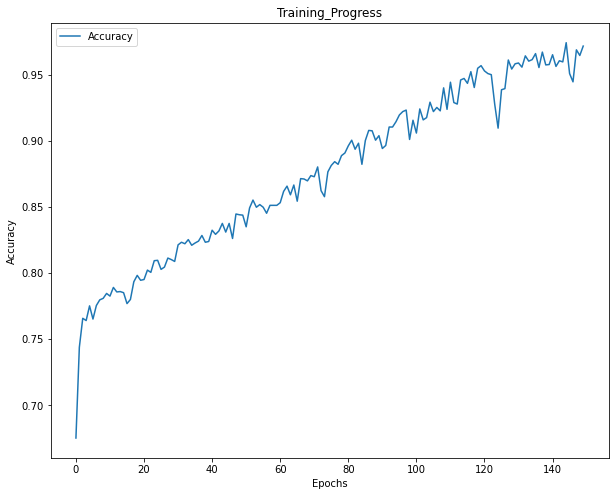

In [13]:
# Train ANN Model with Accuracy Graph
ann.__train__(X,y,val_X,val_y)

Train on 3513 samples, validate on 1172 samples
Epoch 1/25
3513/3513 [==============================] - 27s 8ms/step - loss: 1.1611 - accuracy: 0.5001 - val_loss: 0.9168 - val_accuracy: 0.5307
Epoch 2/25
3513/3513 [==============================] - 27s 8ms/step - loss: 0.6696 - accuracy: 0.7142 - val_loss: 0.6230 - val_accuracy: 0.7329
Epoch 3/25
3513/3513 [==============================] - 30s 8ms/step - loss: 0.5379 - accuracy: 0.7717 - val_loss: 0.6266 - val_accuracy: 0.7372
Epoch 4/25
3513/3513 [==============================] - 26s 7ms/step - loss: 0.4820 - accuracy: 0.7931 - val_loss: 0.6068 - val_accuracy: 0.7449
Epoch 5/25
3513/3513 [==============================] - 27s 8ms/step - loss: 0.4296 - accuracy: 0.8210 - val_loss: 0.5666 - val_accuracy: 0.7594
Epoch 6/25
3513/3513 [==============================] - 29s 8ms/step - loss: 0.3600 - accuracy: 0.8517 - val_loss: 0.5665 - val_accuracy: 0.7543
Epoch 7/25
3513/3513 [==============================] - 29s 8ms/step - loss: 0.330

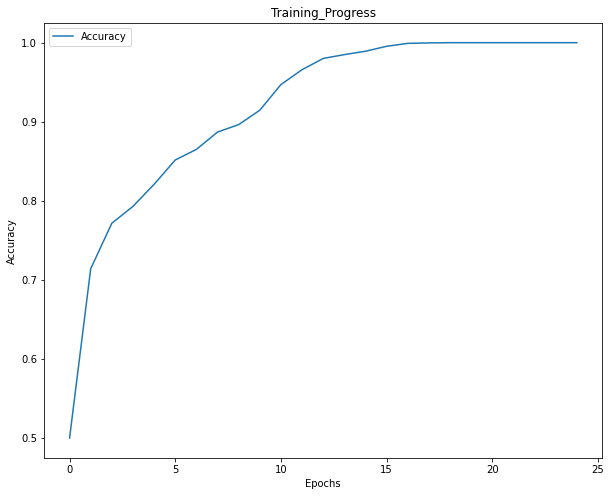

In [14]:
# Train CNN Model with Accuracy Graph
cnn.__train__(X_3d,y_3d,val_X_3d,val_y_3d)

 - **Testing Artificial Neural Network Model & Convolutional Neural Network Model**

In [15]:
# Test ANN Model
ann.__test__(test_X,test_y)

========================= MODEL TEST =========================
Loss test: 0.4387867516294413
Accuracy test: 0.8453695774078369
============================ END ============================


In [16]:
# Test CNN Model
cnn.__test__(test_X_3d,test_y_3d)

========================= MODEL TEST =========================
Loss test: 1.5005383414794757
Accuracy test: 0.7536108493804932
============================ END ============================


 - **Predicting Random Data using Artificial Neural Network Model & Convolutional Neural Network Model**

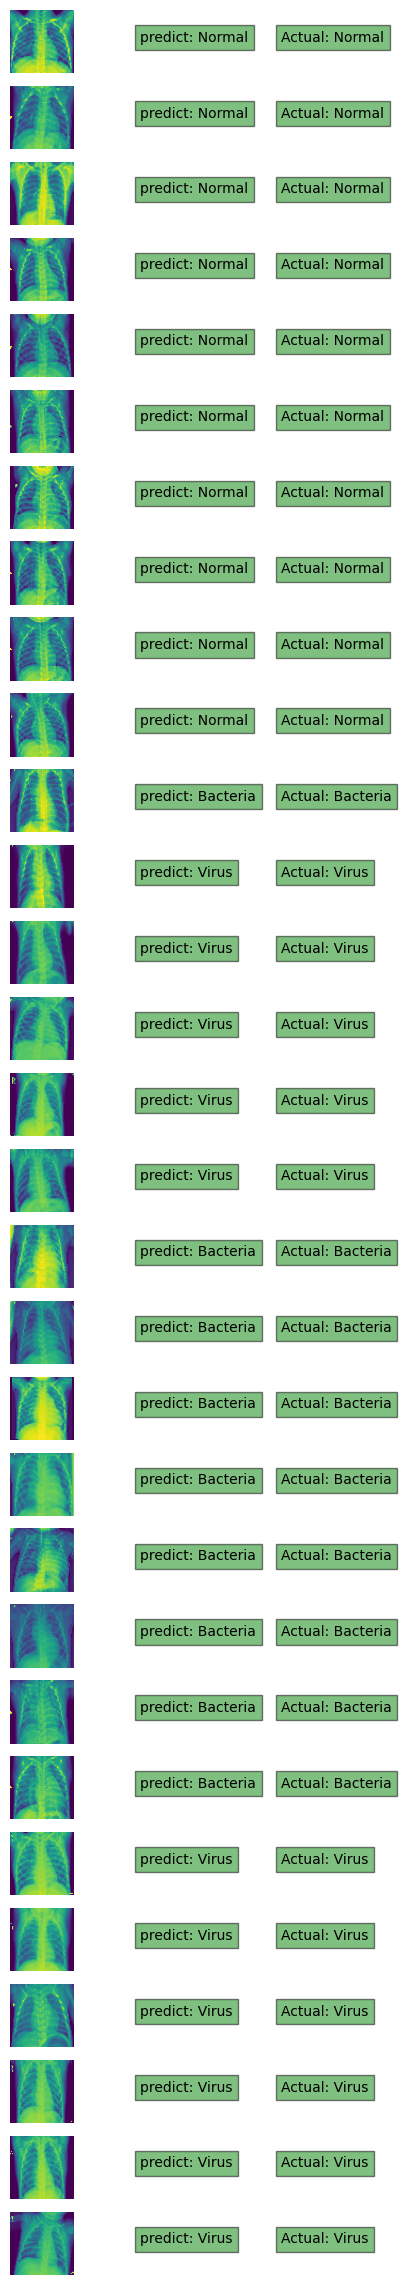

========================= Prediction Accuracy =========================
30
0
Correct Prediction: 30/30
Incorrect Prediction: 0/30
Accuracy: 1.0
================================== END ==================================


In [17]:
# Predict with ANN Model
ann.__predict__(predict_X,predict_y,output=True)

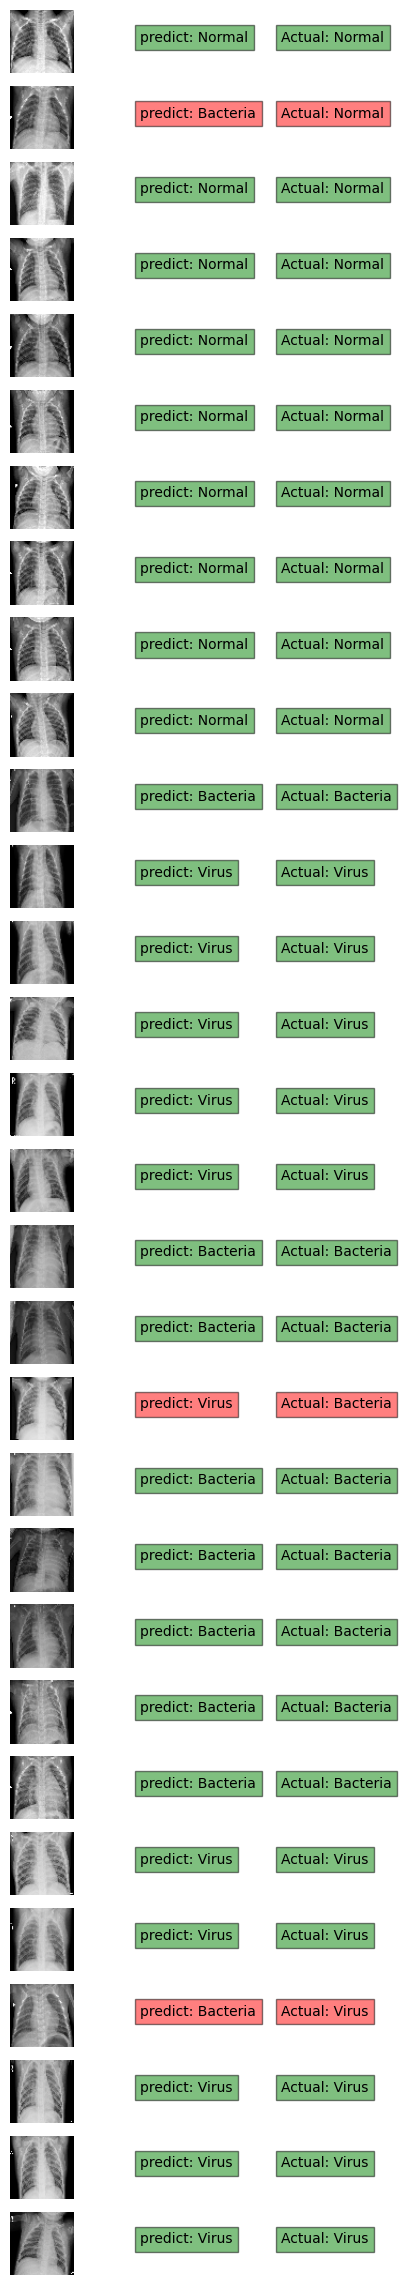

========================= Prediction Accuracy =========================
30
3
Correct Prediction: 27/30
Incorrect Prediction: 3/30
Accuracy: 0.9
================================== END ==================================


In [18]:
# Predict with CNN Model
cnn.__predict__(predict_X_3d,predict_y_3d,output=True)